In [170]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [172]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df_pro = pd.read_csv("C:/Users/PC/desktop/바탕 화면/archive/indiana_projections.csv")
df_pro

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral
7462,3998,3998_IM-2048-1001.dcm.png,Frontal
7463,3998,3998_IM-2048-1002.dcm.png,Lateral
7464,3999,3999_IM-2049-1001.dcm.png,Frontal


In [176]:
df_re = pd.read_csv("C:/Users/PC/desktop/바탕 화면/archive/indiana_reports.csv", index_col=0)
df_re

,MeSH,Problems,image,indication,comparison,findings,impression
uid,,,,,,,
1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...
3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."


In [178]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3851 entries, 1 to 3999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MeSH        3851 non-null   object
 1   Problems    3851 non-null   object
 2   image       3851 non-null   object
 3   indication  3765 non-null   object
 4   comparison  2685 non-null   object
 5   findings    3337 non-null   object
 6   impression  3820 non-null   object
dtypes: object(7)
memory usage: 240.7+ KB


In [180]:
df_pro.drop(df_pro[df_pro['projection']=='Lateral'].index, inplace=True)
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 0 to 7464
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         3818 non-null   int64 
 1   filename    3818 non-null   object
 2   projection  3818 non-null   object
dtypes: int64(1), object(2)
memory usage: 119.3+ KB


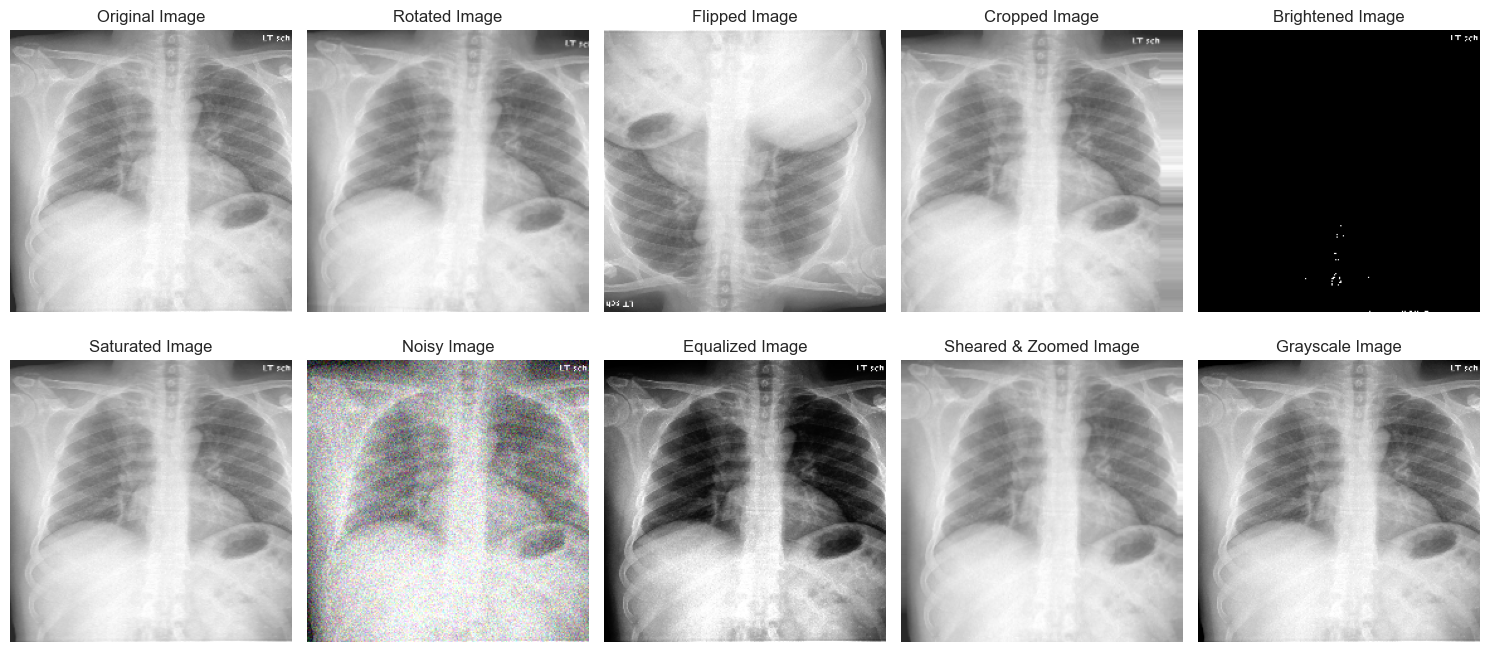

In [182]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

# 이미지 디렉토리 경로
image_dir = r'C:/Users/PC/desktop/바탕 화면/images_normalized'

# 첫 번째 이미지를 로드
img_file = os.listdir(image_dir)[0]  # 첫 번째 이미지 선택 (테스트용)
img_path = os.path.join(image_dir, img_file)

# 이미지 로드 및 전처리
img = load_img(img_path, target_size=(224, 224))  # 크기 조정
img_array = img_to_array(img) / 255.0  # 이미지 정규화 (0~1 범위로)

# 10가지 전처리 방법을 적용

# 1. 원본 이미지
original_img = img_array

# 2. 회전 (Rotation)
datagen = ImageDataGenerator(rotation_range=40)
rotated_img = datagen.random_transform(img_array)

# 3. 수평 및 수직 플립 (Horizontal and Vertical Flip)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
flipped_img = datagen.random_transform(img_array)

# 4. 무작위 자르기 (Random Cropping)
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
cropped_img = datagen.random_transform(img_array)

# 5. 밝기 조정 (Brightness Adjustment)
datagen = ImageDataGenerator(brightness_range=[0.2, 2.0])
bright_img = datagen.random_transform(img_array)

# 6. 채도 및 대비 조정 (Saturation/Contrast Adjustment)
datagen = ImageDataGenerator(shear_range=0.2)
saturated_img = datagen.random_transform(img_array)

# 7. 노이즈 추가 (Noise Addition)
def add_noise(img_array):
    noise = np.random.normal(0, 0.1, img_array.shape)
    noisy_img = img_array + noise
    return np.clip(noisy_img, 0, 1)  # 이미지 값이 [0, 1] 범위를 벗어나지 않게 클리핑

noisy_img = add_noise(img_array)

# 8. 히스토그램 평활화 (Histogram Equalization)
img_gray = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
equalized_img = cv2.equalizeHist(img_gray)

# 9. 회전 및 이동 (Shear and Zoom)
datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2)
sheared_zoomed_img = datagen.random_transform(img_array)

# 10. 흑백 변환 (Grayscale Conversion)
img_gray = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
grayscale_img = img_gray / 255.0  # 다시 정규화

# 이미지 출력
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# 1. 원본 이미지
axes[0, 0].imshow(original_img)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# 2. 회전 (Rotation)
axes[0, 1].imshow(rotated_img)
axes[0, 1].set_title("Rotated Image")
axes[0, 1].axis('off')

# 3. 수평 및 수직 플립 (Flip)
axes[0, 2].imshow(flipped_img)
axes[0, 2].set_title("Flipped Image")
axes[0, 2].axis('off')

# 4. 무작위 자르기 (Random Cropping)
axes[0, 3].imshow(cropped_img)
axes[0, 3].set_title("Cropped Image")
axes[0, 3].axis('off')

# 5. 밝기 조정 (Brightness Adjustment)
axes[0, 4].imshow(bright_img)
axes[0, 4].set_title("Brightened Image")
axes[0, 4].axis('off')

# 6. 채도 및 대비 조정 (Saturation/Contrast Adjustment)
axes[1, 0].imshow(saturated_img)
axes[1, 0].set_title("Saturated Image")
axes[1, 0].axis('off')

# 7. 노이즈 추가 (Noise Addition)
axes[1, 1].imshow(noisy_img)
axes[1, 1].set_title("Noisy Image")
axes[1, 1].axis('off')

# 8. 히스토그램 평활화 (Histogram Equalization)
axes[1, 2].imshow(equalized_img, cmap='gray')
axes[1, 2].set_title("Equalized Image")
axes[1, 2].axis('off')

# 9. 회전 및 이동 (Shear and Zoom)
axes[1, 3].imshow(sheared_zoomed_img)
axes[1, 3].set_title("Sheared & Zoomed Image")
axes[1, 3].axis('off')

# 10. 흑백 변환 (Grayscale Conversion)
axes[1, 4].imshow(grayscale_img, cmap='gray')
axes[1, 4].set_title("Grayscale Image")
axes[1, 4].axis('off')

plt.tight_layout()
plt.show()


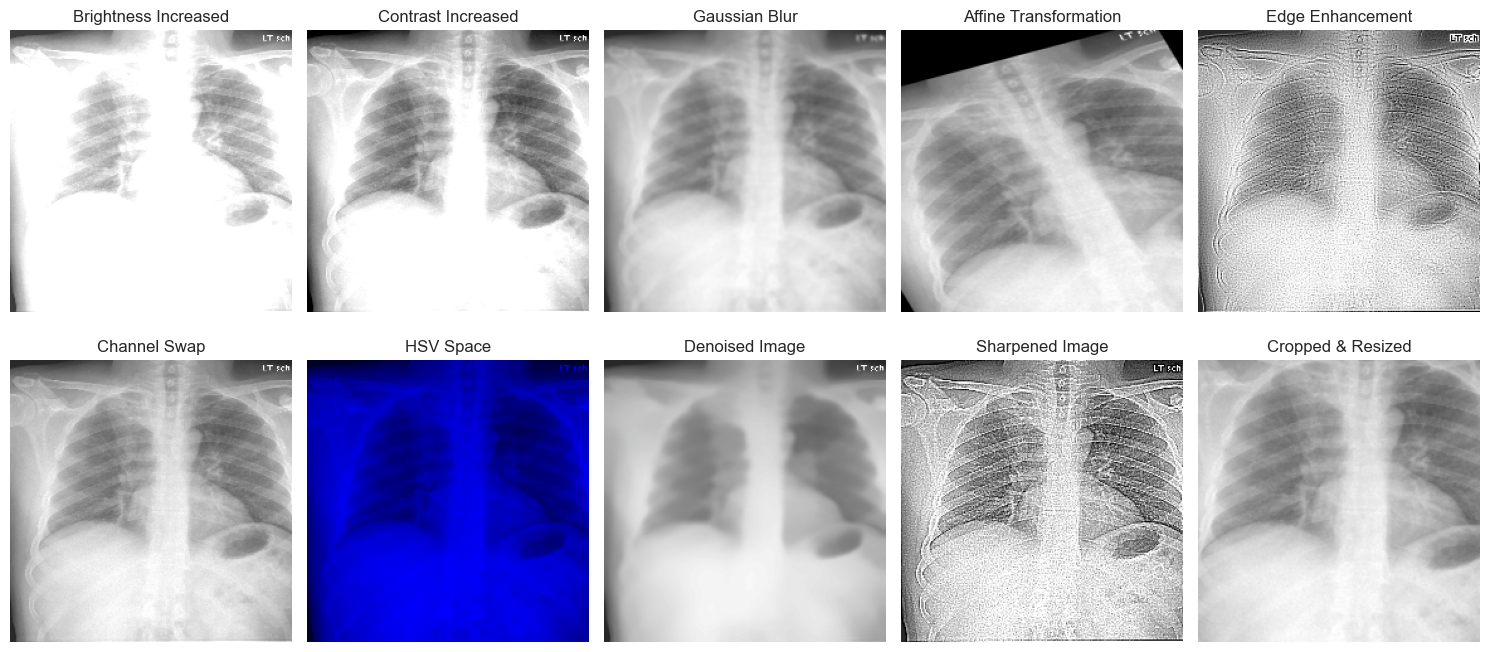

In [185]:
# 1. 이미지 밝기 증가/감소 (Brightness Adjustment)
def adjust_brightness(image, factor):
    return np.clip(image * factor, 0, 1)

bright_img = adjust_brightness(img_array, 1.5)  # 밝기 증가

# 2. 이미지 대비 증가/감소 (Contrast Adjustment)
def adjust_contrast(image, factor):
    return np.clip((image - 0.5) * factor + 0.5, 0, 1)

contrast_img = adjust_contrast(img_array, 1.5)  # 대비 증가

# 3. 이미지 가우시안 블러 (Gaussian Blur)
blurred_img = cv2.GaussianBlur((img_array * 255).astype(np.uint8), (5, 5), 0)
blurred_img = blurred_img / 255.0  # 정규화

# 4. 이미지 모핑 (Affine Transformation)
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
matrix = cv2.getAffineTransform(pts1, pts2)
affine_img = cv2.warpAffine((img_array * 255).astype(np.uint8), matrix, (224, 224))
affine_img = affine_img / 255.0

# 5. 이미지 엣지 강조 (Edge Enhancement)
kernel = np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]])  # 엣지 강조 커널
edge_img = cv2.filter2D((img_array * 255).astype(np.uint8), -1, kernel)
edge_img = edge_img / 255.0

# 6. 채널 스왑 (Channel Swap)
swapped_img = img_array.copy()
swapped_img[:, :, [0, 1]] = swapped_img[:, :, [1, 0]]  # R과 G 채널을 스왑

# 7. 색상 공간 변환 (HSV, LAB 등)
hsv_img = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
hsv_img = hsv_img / 255.0  # 정규화

# 8. 이미지 노이즈 제거 (Denoising)
denoised_img = cv2.fastNlMeansDenoisingColored((img_array * 255).astype(np.uint8), None, 10, 10, 7, 21)
denoised_img = denoised_img / 255.0

# 9. 샤프닝 (Sharpening)
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])  # 샤프닝 커널
sharpened_img = cv2.filter2D((img_array * 255).astype(np.uint8), -1, sharpen_kernel)
sharpened_img = sharpened_img / 255.0

# 10. 이미지 크롭 후 크기 조정 (Random Crop and Resize)
def random_crop_and_resize(image, crop_size=(180, 180), target_size=(224, 224)):
    h, w, _ = image.shape
    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])
    cropped_img = image[top:top+crop_size[0], left:left+crop_size[1]]
    resized_img = cv2.resize(cropped_img, target_size)
    return resized_img

cropped_resized_img = random_crop_and_resize(img_array)

# 10가지 전처리된 이미지를 출력
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# 1. 밝기 증가
axes[0, 0].imshow(bright_img)
axes[0, 0].set_title("Brightness Increased")
axes[0, 0].axis('off')

# 2. 대비 증가
axes[0, 1].imshow(contrast_img)
axes[0, 1].set_title("Contrast Increased")
axes[0, 1].axis('off')

# 3. 가우시안 블러
axes[0, 2].imshow(blurred_img)
axes[0, 2].set_title("Gaussian Blur")
axes[0, 2].axis('off')

# 4. 모핑 (Affine Transformation)
axes[0, 3].imshow(affine_img)
axes[0, 3].set_title("Affine Transformation")
axes[0, 3].axis('off')

# 5. 엣지 강조
axes[0, 4].imshow(edge_img)
axes[0, 4].set_title("Edge Enhancement")
axes[0, 4].axis('off')

# 6. 채널 스왑
axes[1, 0].imshow(swapped_img)
axes[1, 0].set_title("Channel Swap")
axes[1, 0].axis('off')

# 7. 색상 공간 변환 (HSV)
axes[1, 1].imshow(hsv_img)
axes[1, 1].set_title("HSV Space")
axes[1, 1].axis('off')

# 8. 노이즈 제거
axes[1, 2].imshow(denoised_img)
axes[1, 2].set_title("Denoised Image")
axes[1, 2].axis('off')

# 9. 샤프닝
axes[1, 3].imshow(sharpened_img)
axes[1, 3].set_title("Sharpened Image")
axes[1, 3].axis('off')

# 10. 크롭 후 크기 조정
axes[1, 4].imshow(cropped_resized_img)
axes[1, 4].set_title("Cropped & Resized")
axes[1, 4].axis('off')

plt.tight_layout()
plt.show()
